In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

#%pip install statsmodels
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.options.display.float_format = '{:,.3f}'.format


In [2]:
#Reading the file and having a look in what we have inside the dataset
fifa_df = pd.read_csv('fifa21_male2.csv')
fifa_df.head()

/var/folders/xb/vbkygnls2kq6z12lrq5ymftc0000gn/T/ipykernel_47559/3079740220.py:2: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa_df = pd.read_csv('fifa21_male2.csv')


ID         Name  Age  OVA            Nationality           Club  BOV   BP  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position                                       Player Photo  ...  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png  ...   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png  ...   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png  ...   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png  ...   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png  ...   

     CDM    RDM    RWB     LB   LCB    CB   RCB     RB    GK Gender  
0  70+-1  70+-1  71+-2  70+-1  69+0  69+0  69+0  70+-1  17+0   Male  
1   66+1   66+1   62+1   60+1  60+1  60+1  60+1   60+1  17+1   Male  
2   54+0   54+0   52+0   47+0  46+0  46+0  46+0   47+0  15+0   Male  
3   65+0   65+0   56+0   57+0  51+0  51+0  51+0   57+0  22+0   Male  
4   73+3   73+3   70+3   67+3  64+3  64+3  64+3   67+3  17+3   Male  

[5 rows x 107 columns]

In [3]:
# Checking the number of nulls in the dataset. We used this code to show only the columns with null values, since the dataset has so many columns that vs code doesn't show
# all of them when we use df.isnull().sum()

fifa_df[fifa_df.columns[fifa_df.isnull().any()]].isnull().sum()

Club                 23
Position            413
Club Logo            23
Joined               58
Loan Date End     16215
Volleys              58
Curve                58
Agility              58
Balance              58
Jumping              58
Interceptions         7
Positioning           7
Vision               58
Composure           423
Sliding Tackle       58
A/W                  89
D/W                  89
dtype: int64

In [4]:
#Using this code to be able to see all the columns that we have in the dataset
np.array(fifa_df.columns).reshape(-1)

array(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'Player Photo', 'Club Logo', 'Flag Photo', 'POT',
       'Team & Contract', 'Height', 'Weight', 'foot', 'Growth', 'Joined',
       'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract',
       'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending',
       'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W',
       'D/W', 'IR', 'PAC', 'SHO', 'P

In [5]:
#Selecting the players that play in Striker (ST) position
fifa_ST = fifa_df.query('BP == "ST"')
fifa_ST

ID             Name  Age  OVA            Nationality  \
3          36         D. Yorke   36   68  Trinidad &amp; Tobago   
17        670             Zulu   26   66                 Brazil   
29       1198       F. Inzaghi   37   73                  Italy   
39       1845      O. Solskjær   34   75                 Norway   
44       2231        E. Heskey   37   66                England   
...       ...              ...  ...  ...                    ...   
17095  259031         L. Delap   17   61                England   
17104  259054     Tiago Morais   16   61               Portugal   
17111  259071     Adrián Turmo   19   62                  Spain   
17118  259084       R. Shanley   19   54               Scotland   
17124  259105  Pablo Rodríguez   18   59                  Spain   

                    Club  BOV  BP Position  \
3             Sunderland   70  ST      NaN   
17       Pohang Steelers   66  ST      NaN   
29                 Milan   72  ST       ST   
39     Manchester United   75  ST       ST   
44      Bolton Wanderers   66  ST      NaN   
...                  ...  ...  ..      ...   
17095    Manchester City   63  ST       ST   
17104        Boavista FC   63  ST       ST   
17111          Girona FC   64  ST       ST   
17118          Hibernian   56  ST       ST   
17124              Lecce   61  ST       ST   

                                            Player Photo  ...   CDM   RDM  \
3      https://cdn.sofifa.com/players/000/036/09_120.png  ...  65+0  65+0   
17     https://cdn.sofifa.com/players/000/670/11_120.png  ...  54+0  54+0   
29     https://cdn.sofifa.com/players/001/198/12_120.png  ...  40+1  40+1   
39     https://cdn.sofifa.com/players/001/845/08_120.png  ...  62+0  62+0   
44     https://cdn.sofifa.com/players/002/231/16_120.png  ...  56+0  56+0   
...                                                  ...  ...   ...   ...   
17095  https://cdn.sofifa.com/players/259/031/20_120.png  ...  38+2  38+2   
17104  https://cdn.sofifa.com/players/259/054/20_120.png  ...  38+2  38+2   
17111  https://cdn.sofifa.com/players/259/071/20_120.png  ...  38+2  38+2   
17118  https://cdn.sofifa.com/players/259/084/20_120.png  ...  36+2  36+2   
17124  https://cdn.sofifa.com/players/259/105/20_120.png  ...  32+2  32+2   

        RWB    LB   LCB    CB   RCB    RB    GK Gender  
3      56+0  57+0  51+0  51+0  51+0  57+0  22+0   Male  
17     51+0  51+0  54+0  54+0  54+0  51+0  16+0   Male  
29     38+1  37+1  35+1  35+1  35+1  37+1  15+1   Male  
39     52+0  53+0  49+0  49+0  49+0  53+0  23+0   Male  
44     52+0  51+0  58+0  58+0  58+0  51+0  19+0   Male  
...     ...   ...   ...   ...   ...   ...   ...    ...  
17095  42+2  40+2  35+2  35+2  35+2  40+2  14+2   Male  
17104  45+2  42+2  33+2  33+2  33+2  42+2  17+2   Male  
17111  41+2  39+2  35+2  35+2  35+2  39+2  16+2   Male  
17118  39+2  38+2  37+2  37+2  37+2  38+2  15+2   Male  
17124  36+2  34+2  30+2  30+2  30+2  34+2  14+2   Male  

[2660 rows x 107 columns]

In [6]:
#Selecting the columns that we will use to our analysis
fifa_ST_filtered = fifa_ST[['ID', 'Name', 'Age', 'Height', 'Weight', 'Shot Power', 'Skill', 'Mentality', 'Dribbling', 'Sprint Speed', 'Acceleration', 'Agility', 'Stamina', 'Balance', 'ST']]
fifa_ST_filtered


ID             Name  Age Height  Weight  Shot Power  Skill  \
3          36         D. Yorke   36  5'11"  165lbs          63    255   
17        670             Zulu   26   6'4"  198lbs          56    269   
29       1198       F. Inzaghi   37  5'11"  163lbs          55    237   
39       1845      O. Solskjær   34   5'9"  163lbs          72    264   
44       2231        E. Heskey   37   6'1"  205lbs          77    265   
...       ...              ...  ...    ...     ...         ...    ...   
17095  259031         L. Delap   17   6'1"  159lbs          64    254   
17104  259054     Tiago Morais   16   5'9"  132lbs          65    269   
17111  259071     Adrián Turmo   19   5'9"  154lbs          66    236   
17118  259084       R. Shanley   19   6'1"  161lbs          53    199   
17124  259105  Pablo Rodríguez   18  5'10"  154lbs          58    235   

       Mentality  Dribbling  Sprint Speed  Acceleration  Agility  Stamina  \
3            271         68            62            59      NaN       51   
17           261         61            76            72   68.000       71   
29           288         50            39            67   53.000       31   
39           287         74            64            65      NaN       58   
44           329         63            45            42   50.000       33   
...          ...        ...           ...           ...      ...      ...   
17095        217         59            79            77   74.000       57   
17104        224         62            78            75   77.000       56   
17111        254         58            75            78   72.000       58   
17118        221         50            67            66   62.000       57   
17124        224         57            72            68   59.000       55   

       Balance    ST  
3          NaN  67+0  
17      78.000  66+0  
29      65.000  72+1  
39         NaN  75+0  
44      46.000  66+0  
...        ...   ...  
17095   62.000  61+2  
17104   72.000  61+2  
17111   77.000  62+2  
17118   58.000  54+2  
17124   65.000  59+2  

[2660 rows x 15 columns]

In [7]:
#Checking the data types of our columns
fifa_ST_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2660 entries, 3 to 17124
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2660 non-null   int64  
 1   Name          2660 non-null   object 
 2   Age           2660 non-null   int64  
 3   Height        2660 non-null   object 
 4   Weight        2660 non-null   object 
 5   Shot Power    2660 non-null   int64  
 6   Skill         2660 non-null   int64  
 7   Mentality     2660 non-null   int64  
 8   Dribbling     2660 non-null   int64  
 9   Sprint Speed  2660 non-null   int64  
 10  Acceleration  2660 non-null   int64  
 11  Agility       2644 non-null   float64
 12  Stamina       2660 non-null   int64  
 13  Balance       2644 non-null   float64
 14  ST            2660 non-null   object 
dtypes: float64(2), int64(9), object(4)
memory usage: 332.5+ KB


In [8]:
#Checking the null values of our selected columns
fifa_ST_filtered.isnull().sum()

ID               0
Name             0
Age              0
Height           0
Weight           0
Shot Power       0
Skill            0
Mentality        0
Dribbling        0
Sprint Speed     0
Acceleration     0
Agility         16
Stamina          0
Balance         16
ST               0
dtype: int64

In [9]:
#Drpoping the null values, because they are a small amount compared to the size of the dataset
fifa_ST_filtered.dropna(inplace=True)
fifa_ST_filtered

/var/folders/xb/vbkygnls2kq6z12lrq5ymftc0000gn/T/ipykernel_47559/3594039841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_ST_filtered.dropna(inplace=True)


ID             Name  Age Height  Weight  Shot Power  Skill  \
17        670             Zulu   26   6'4"  198lbs          56    269   
29       1198       F. Inzaghi   37  5'11"  163lbs          55    237   
44       2231        E. Heskey   37   6'1"  205lbs          77    265   
47       2702       K. Ellison   41  5'11"  168lbs          69    296   
52       3467             Yuri   37   6'1"  172lbs          69    318   
...       ...              ...  ...    ...     ...         ...    ...   
17095  259031         L. Delap   17   6'1"  159lbs          64    254   
17104  259054     Tiago Morais   16   5'9"  132lbs          65    269   
17111  259071     Adrián Turmo   19   5'9"  154lbs          66    236   
17118  259084       R. Shanley   19   6'1"  161lbs          53    199   
17124  259105  Pablo Rodríguez   18  5'10"  154lbs          58    235   

       Mentality  Dribbling  Sprint Speed  Acceleration  Agility  Stamina  \
17           261         61            76            72   68.000       71   
29           288         50            39            67   53.000       31   
44           329         63            45            42   50.000       33   
47           311         64            42            45   60.000       49   
52           296         70            67            64   68.000       65   
...          ...        ...           ...           ...      ...      ...   
17095        217         59            79            77   74.000       57   
17104        224         62            78            75   77.000       56   
17111        254         58            75            78   72.000       58   
17118        221         50            67            66   62.000       57   
17124        224         57            72            68   59.000       55   

       Balance     ST  
17      78.000   66+0  
29      65.000   72+1  
44      46.000   66+0  
47      67.000  61+-3  
52      56.000   71+0  
...        ...    ...  
17095   62.000   61+2  
17104   72.000   61+2  
17111   77.000   62+2  
17118   58.000   54+2  
17124   65.000   59+2  

[2644 rows x 15 columns]

In [10]:
#Confirming that we removed the nulls
fifa_ST_filtered.isnull().sum()

ID              0
Name            0
Age             0
Height          0
Weight          0
Shot Power      0
Skill           0
Mentality       0
Dribbling       0
Sprint Speed    0
Acceleration    0
Agility         0
Stamina         0
Balance         0
ST              0
dtype: int64

In [11]:
#Checking how many rows we have lost (16 rows)
fifa_ST_filtered.shape

(2644, 15)

In [12]:
# Height and Weight are in the North American measures, so we will transform to the metric system
fifa_ST_filtered['Height'].str.split("'")

17        [6, 4"]
29       [5, 11"]
44        [6, 1"]
47       [5, 11"]
52        [6, 1"]
           ...   
17095     [6, 1"]
17104     [5, 9"]
17111     [5, 9"]
17118     [6, 1"]
17124    [5, 10"]
Name: Height, Length: 2644, dtype: object

In [13]:
#Removing the quotation marks
foots = (fifa_ST_filtered['Height'].str.split("'")).str[0]
inches = (fifa_ST_filtered['Height'].str.split("'")).str[1].str.rstrip('"')

In [14]:
#Transforming the foots and inches to integer so we can transform them to the metric system
foots_list = [int(i) for i in foots]
inches_list = [int(i) for i in inches]

In [15]:
#Checking if now the data type is integer
type(inches_list[0])

int

In [16]:
#Transforming the hight to cm
hight_cm = list(map(lambda x, y: round(((x*12)+y) * 2.54, 2) , foots_list, inches_list))

In [17]:
#Dropping the height column of the dataset
fifa_ST_filtered.drop('Height', axis=1)

ID             Name  Age  Weight  Shot Power  Skill  Mentality  \
17        670             Zulu   26  198lbs          56    269        261   
29       1198       F. Inzaghi   37  163lbs          55    237        288   
44       2231        E. Heskey   37  205lbs          77    265        329   
47       2702       K. Ellison   41  168lbs          69    296        311   
52       3467             Yuri   37  172lbs          69    318        296   
...       ...              ...  ...     ...         ...    ...        ...   
17095  259031         L. Delap   17  159lbs          64    254        217   
17104  259054     Tiago Morais   16  132lbs          65    269        224   
17111  259071     Adrián Turmo   19  154lbs          66    236        254   
17118  259084       R. Shanley   19  161lbs          53    199        221   
17124  259105  Pablo Rodríguez   18  154lbs          58    235        224   

       Dribbling  Sprint Speed  Acceleration  Agility  Stamina  Balance     ST  
17            61            76            72   68.000       71   78.000   66+0  
29            50            39            67   53.000       31   65.000   72+1  
44            63            45            42   50.000       33   46.000   66+0  
47            64            42            45   60.000       49   67.000  61+-3  
52            70            67            64   68.000       65   56.000   71+0  
...          ...           ...           ...      ...      ...      ...    ...  
17095         59            79            77   74.000       57   62.000   61+2  
17104         62            78            75   77.000       56   72.000   61+2  
17111         58            75            78   72.000       58   77.000   62+2  
17118         50            67            66   62.000       57   58.000   54+2  
17124         57            72            68   59.000       55   65.000   59+2  

[2644 rows x 14 columns]

In [18]:
#Creating a new column using our transformed hights
fifa_ST_filtered['Height'] = hight_cm

/var/folders/xb/vbkygnls2kq6z12lrq5ymftc0000gn/T/ipykernel_47559/1943028367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_ST_filtered['Height'] = hight_cm


In [19]:
fifa_ST_filtered

ID             Name  Age  Height  Weight  Shot Power  Skill  \
17        670             Zulu   26 193.040  198lbs          56    269   
29       1198       F. Inzaghi   37 180.340  163lbs          55    237   
44       2231        E. Heskey   37 185.420  205lbs          77    265   
47       2702       K. Ellison   41 180.340  168lbs          69    296   
52       3467             Yuri   37 185.420  172lbs          69    318   
...       ...              ...  ...     ...     ...         ...    ...   
17095  259031         L. Delap   17 185.420  159lbs          64    254   
17104  259054     Tiago Morais   16 175.260  132lbs          65    269   
17111  259071     Adrián Turmo   19 175.260  154lbs          66    236   
17118  259084       R. Shanley   19 185.420  161lbs          53    199   
17124  259105  Pablo Rodríguez   18 177.800  154lbs          58    235   

       Mentality  Dribbling  Sprint Speed  Acceleration  Agility  Stamina  \
17           261         61            76            72   68.000       71   
29           288         50            39            67   53.000       31   
44           329         63            45            42   50.000       33   
47           311         64            42            45   60.000       49   
52           296         70            67            64   68.000       65   
...          ...        ...           ...           ...      ...      ...   
17095        217         59            79            77   74.000       57   
17104        224         62            78            75   77.000       56   
17111        254         58            75            78   72.000       58   
17118        221         50            67            66   62.000       57   
17124        224         57            72            68   59.000       55   

       Balance     ST  
17      78.000   66+0  
29      65.000   72+1  
44      46.000   66+0  
47      67.000  61+-3  
52      56.000   71+0  
...        ...    ...  
17095   62.000   61+2  
17104   72.000   61+2  
17111   77.000   62+2  
17118   58.000   54+2  
17124   65.000   59+2  

[2644 rows x 15 columns]

In [20]:
#Transforming weight to the metric system
weights = (fifa_ST_filtered['Weight'].str.split("lbs")).str[0]
weights = [round(float(i)*0.4535,2) for i in weights]


In [21]:
# Dropping the original weight column
fifa_ST_filtered.drop("Weight", axis=1)

ID             Name  Age  Height  Shot Power  Skill  Mentality  \
17        670             Zulu   26 193.040          56    269        261   
29       1198       F. Inzaghi   37 180.340          55    237        288   
44       2231        E. Heskey   37 185.420          77    265        329   
47       2702       K. Ellison   41 180.340          69    296        311   
52       3467             Yuri   37 185.420          69    318        296   
...       ...              ...  ...     ...         ...    ...        ...   
17095  259031         L. Delap   17 185.420          64    254        217   
17104  259054     Tiago Morais   16 175.260          65    269        224   
17111  259071     Adrián Turmo   19 175.260          66    236        254   
17118  259084       R. Shanley   19 185.420          53    199        221   
17124  259105  Pablo Rodríguez   18 177.800          58    235        224   

       Dribbling  Sprint Speed  Acceleration  Agility  Stamina  Balance     ST  
17            61            76            72   68.000       71   78.000   66+0  
29            50            39            67   53.000       31   65.000   72+1  
44            63            45            42   50.000       33   46.000   66+0  
47            64            42            45   60.000       49   67.000  61+-3  
52            70            67            64   68.000       65   56.000   71+0  
...          ...           ...           ...      ...      ...      ...    ...  
17095         59            79            77   74.000       57   62.000   61+2  
17104         62            78            75   77.000       56   72.000   61+2  
17111         58            75            78   72.000       58   77.000   62+2  
17118         50            67            66   62.000       57   58.000   54+2  
17124         57            72            68   59.000       55   65.000   59+2  

[2644 rows x 14 columns]

In [22]:
#Inserting a new weight columns with the transformed weight
fifa_ST_filtered['Weight'] = weights

/var/folders/xb/vbkygnls2kq6z12lrq5ymftc0000gn/T/ipykernel_47559/689916873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_ST_filtered['Weight'] = weights


In [23]:
fifa_ST_filtered

ID             Name  Age  Height  Weight  Shot Power  Skill  \
17        670             Zulu   26 193.040  89.790          56    269   
29       1198       F. Inzaghi   37 180.340  73.920          55    237   
44       2231        E. Heskey   37 185.420  92.970          77    265   
47       2702       K. Ellison   41 180.340  76.190          69    296   
52       3467             Yuri   37 185.420  78.000          69    318   
...       ...              ...  ...     ...     ...         ...    ...   
17095  259031         L. Delap   17 185.420  72.110          64    254   
17104  259054     Tiago Morais   16 175.260  59.860          65    269   
17111  259071     Adrián Turmo   19 175.260  69.840          66    236   
17118  259084       R. Shanley   19 185.420  73.010          53    199   
17124  259105  Pablo Rodríguez   18 177.800  69.840          58    235   

       Mentality  Dribbling  Sprint Speed  Acceleration  Agility  Stamina  \
17           261         61            76            72   68.000       71   
29           288         50            39            67   53.000       31   
44           329         63            45            42   50.000       33   
47           311         64            42            45   60.000       49   
52           296         70            67            64   68.000       65   
...          ...        ...           ...           ...      ...      ...   
17095        217         59            79            77   74.000       57   
17104        224         62            78            75   77.000       56   
17111        254         58            75            78   72.000       58   
17118        221         50            67            66   62.000       57   
17124        224         57            72            68   59.000       55   

       Balance     ST  
17      78.000   66+0  
29      65.000   72+1  
44      46.000   66+0  
47      67.000  61+-3  
52      56.000   71+0  
...        ...    ...  
17095   62.000   61+2  
17104   72.000   61+2  
17111   77.000   62+2  
17118   58.000   54+2  
17124   65.000   59+2  

[2644 rows x 15 columns]

In [24]:
#Transforming the ST column with eval function (that evaluates the string expression and returns its value)
fifa_ST_filtered['ST'] = fifa_ST_filtered['ST'].apply(eval)

/var/folders/xb/vbkygnls2kq6z12lrq5ymftc0000gn/T/ipykernel_47559/4158490795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_ST_filtered['ST'] = fifa_ST_filtered['ST'].apply(eval)


In [25]:
fifa_ST_filtered

ID             Name  Age  Height  Weight  Shot Power  Skill  \
17        670             Zulu   26 193.040  89.790          56    269   
29       1198       F. Inzaghi   37 180.340  73.920          55    237   
44       2231        E. Heskey   37 185.420  92.970          77    265   
47       2702       K. Ellison   41 180.340  76.190          69    296   
52       3467             Yuri   37 185.420  78.000          69    318   
...       ...              ...  ...     ...     ...         ...    ...   
17095  259031         L. Delap   17 185.420  72.110          64    254   
17104  259054     Tiago Morais   16 175.260  59.860          65    269   
17111  259071     Adrián Turmo   19 175.260  69.840          66    236   
17118  259084       R. Shanley   19 185.420  73.010          53    199   
17124  259105  Pablo Rodríguez   18 177.800  69.840          58    235   

       Mentality  Dribbling  Sprint Speed  Acceleration  Agility  Stamina  \
17           261         61            76            72   68.000       71   
29           288         50            39            67   53.000       31   
44           329         63            45            42   50.000       33   
47           311         64            42            45   60.000       49   
52           296         70            67            64   68.000       65   
...          ...        ...           ...           ...      ...      ...   
17095        217         59            79            77   74.000       57   
17104        224         62            78            75   77.000       56   
17111        254         58            75            78   72.000       58   
17118        221         50            67            66   62.000       57   
17124        224         57            72            68   59.000       55   

       Balance  ST  
17      78.000  66  
29      65.000  73  
44      46.000  66  
47      67.000  58  
52      56.000  71  
...        ...  ..  
17095   62.000  63  
17104   72.000  63  
17111   77.000  64  
17118   58.000  56  
17124   65.000  61  

[2644 rows x 15 columns]

In [26]:
#Checking if the dtypes are correct
fifa_ST_filtered.dtypes

ID                int64
Name             object
Age               int64
Height          float64
Weight          float64
Shot Power        int64
Skill             int64
Mentality         int64
Dribbling         int64
Sprint Speed      int64
Acceleration      int64
Agility         float64
Stamina           int64
Balance         float64
ST                int64
dtype: object

In [27]:
#Saving the clean data set in a new CSV file
fifa_ST_filtered.to_csv('fifa_ST_filtered.csv', index=False)

In [28]:
round(fifa_ST_filtered.describe(), 2)

ID       Age    Height    Weight  Shot Power     Skill  \
count   2,644.000 2,644.000 2,644.000 2,644.000   2,644.000 2,644.000   
mean  220,137.130    25.170   183.200    77.430      68.080   272.690   
std    37,290.090     4.910     6.000     6.720       8.640    42.300   
min       670.000    16.000   160.020    53.970      41.000   170.000   
25%   204,784.250    21.000   177.800    73.010      62.000   241.000   
50%   229,729.500    25.000   182.880    77.090      68.000   271.000   
75%   244,606.000    29.000   187.960    82.080      74.000   301.000   
max   259,105.000    41.000   203.200   110.200      94.000   429.000   

       Mentality  Dribbling  Sprint Speed  Acceleration   Agility   Stamina  \
count  2,644.000  2,644.000     2,644.000     2,644.000 2,644.000 2,644.000   
mean     268.190     64.010        69.520        68.290    65.780    63.500   
std       40.170      7.830        10.880        11.170    10.310    10.600   
min      165.000     38.000        30.000        27.000    29.000    27.000   
25%      237.000     59.000        64.000        63.000    60.000    57.000   
50%      266.000     64.000        70.000        69.000    67.000    64.000   
75%      297.000     69.000        77.000        76.000    73.000    71.000   
max      396.000     92.000        96.000        96.000    92.000    94.000   

        Balance        ST  
count 2,644.000 2,644.000  
mean     63.060    67.320  
std      11.560     6.430  
min      25.000    48.000  
25%      57.000    63.000  
50%      65.000    67.000  
75%      71.000    71.000  
max      93.000    92.000

<Axes: >

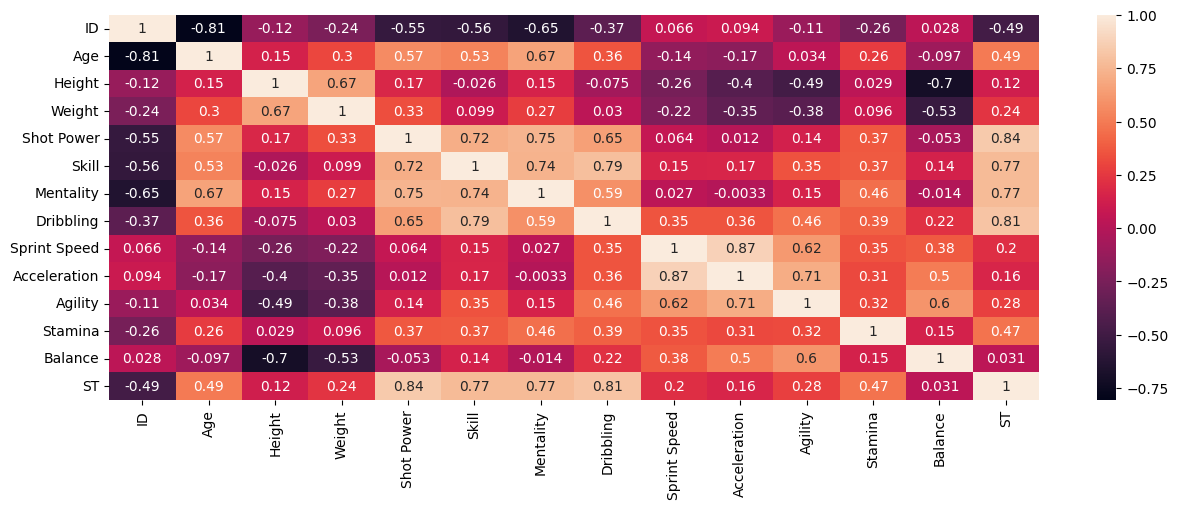

In [29]:
#Checking the correlations to see what is more correlated with ST
fifa_corr = fifa_ST_filtered.corr(method='spearman', numeric_only=True, )
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(fifa_corr, annot=True)

In [30]:
#ST is more correlated Shot Power, Skill, Mentality and Dribbling

In [31]:
# Plotting the features with more correlation with ST and ST

fifa_corr_columns = fifa_ST_filtered[['Shot Power', 'Skill', 'Mentality', 'Dribbling', 'ST']]

fig = make_subplots(rows=fifa_corr_columns.shape[1], cols=2)
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Create a loop for histogram plots
for i, col in enumerate(fifa_corr_columns.columns):
    fig.add_trace(go.Histogram(x=fifa_ST_filtered[col], name=col, marker=dict(color=colors[i])), row=i+1, col=1)

# Create a loop for box plots
for i, col in enumerate(fifa_corr_columns.columns):
    fig.add_trace(go.Box(x=fifa_ST_filtered[col], name=col, marker=dict(color=colors[i])), row=i+1, col=2)

# Adjust the height, width, and title of the layout
fig.update_layout(height=200 * fifa_corr_columns.shape[1], width=1000, title_text="Numerical variables distributions")
fig.show()

In [32]:
#All these features (shot power, skill, mentality, dribbling and ST) have a uniform distribution and seem to have a normal distribution

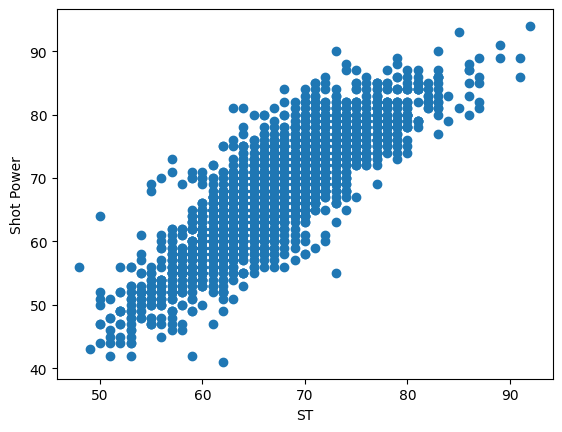

In [33]:
#Plotting each of the features more correlated with ST and ST
plt.scatter(y=fifa_ST_filtered['Shot Power'], x=fifa_ST_filtered['ST'])
plt.xlabel('ST')
plt.ylabel('Shot Power')
plt.show()

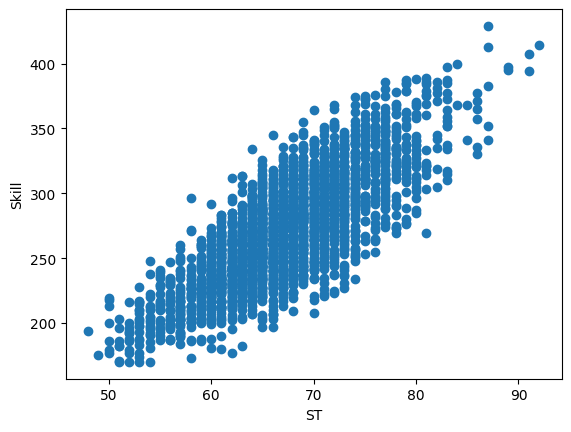

In [34]:
plt.scatter(y=fifa_ST_filtered['Skill'], x=fifa_ST_filtered['ST'])
plt.xlabel('ST')
plt.ylabel('Skill')
plt.show()

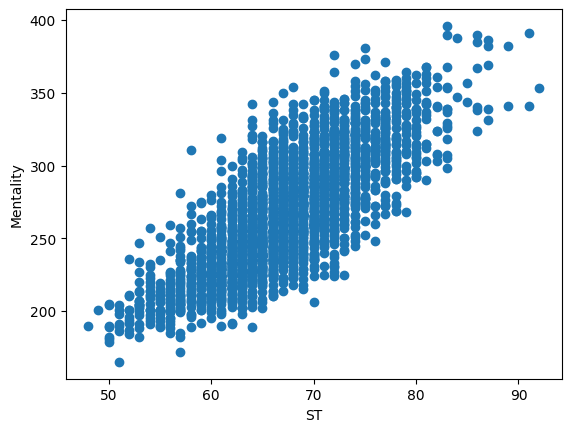

In [35]:
plt.scatter(y=fifa_ST_filtered['Mentality'], x=fifa_ST_filtered['ST'])
plt.xlabel('ST')
plt.ylabel('Mentality')
plt.show()

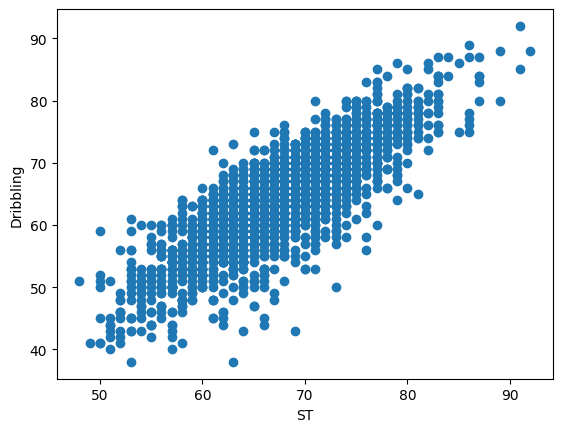

In [36]:
plt.scatter(y=fifa_ST_filtered['Dribbling'], x=fifa_ST_filtered['ST'])
plt.xlabel('ST')
plt.ylabel('Dribbling')
plt.show()

In [37]:
#All the features seems to have a linear correlation with our target (ST)

<Axes: >

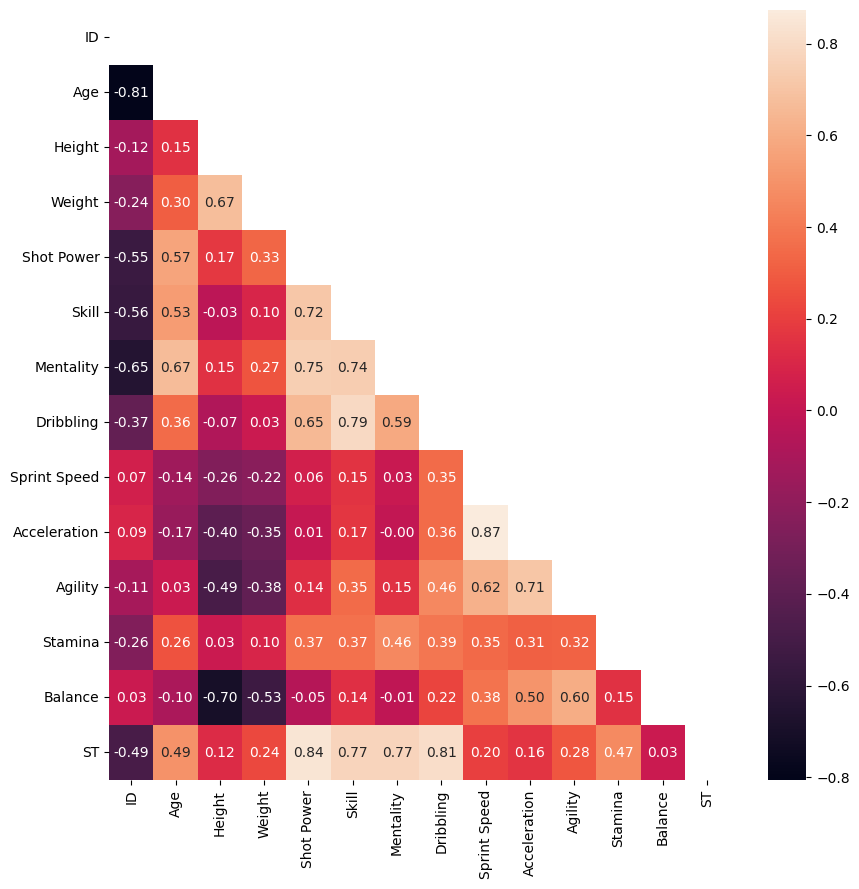

In [38]:
# After preparinf data set, now it's the time to see how features are corelated. the Heat map is a proper choice.
# The method is set to Spearman, since the size of data set is relatively large.

fifa_ST_filtered_corr = fifa_ST_filtered.corr(method='spearman', numeric_only=True)
mask = np.zeros_like(fifa_ST_filtered_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (10,10))
sns.heatmap(fifa_ST_filtered_corr, mask=mask, annot=True,annot_kws={'size': 10},fmt=".2f")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



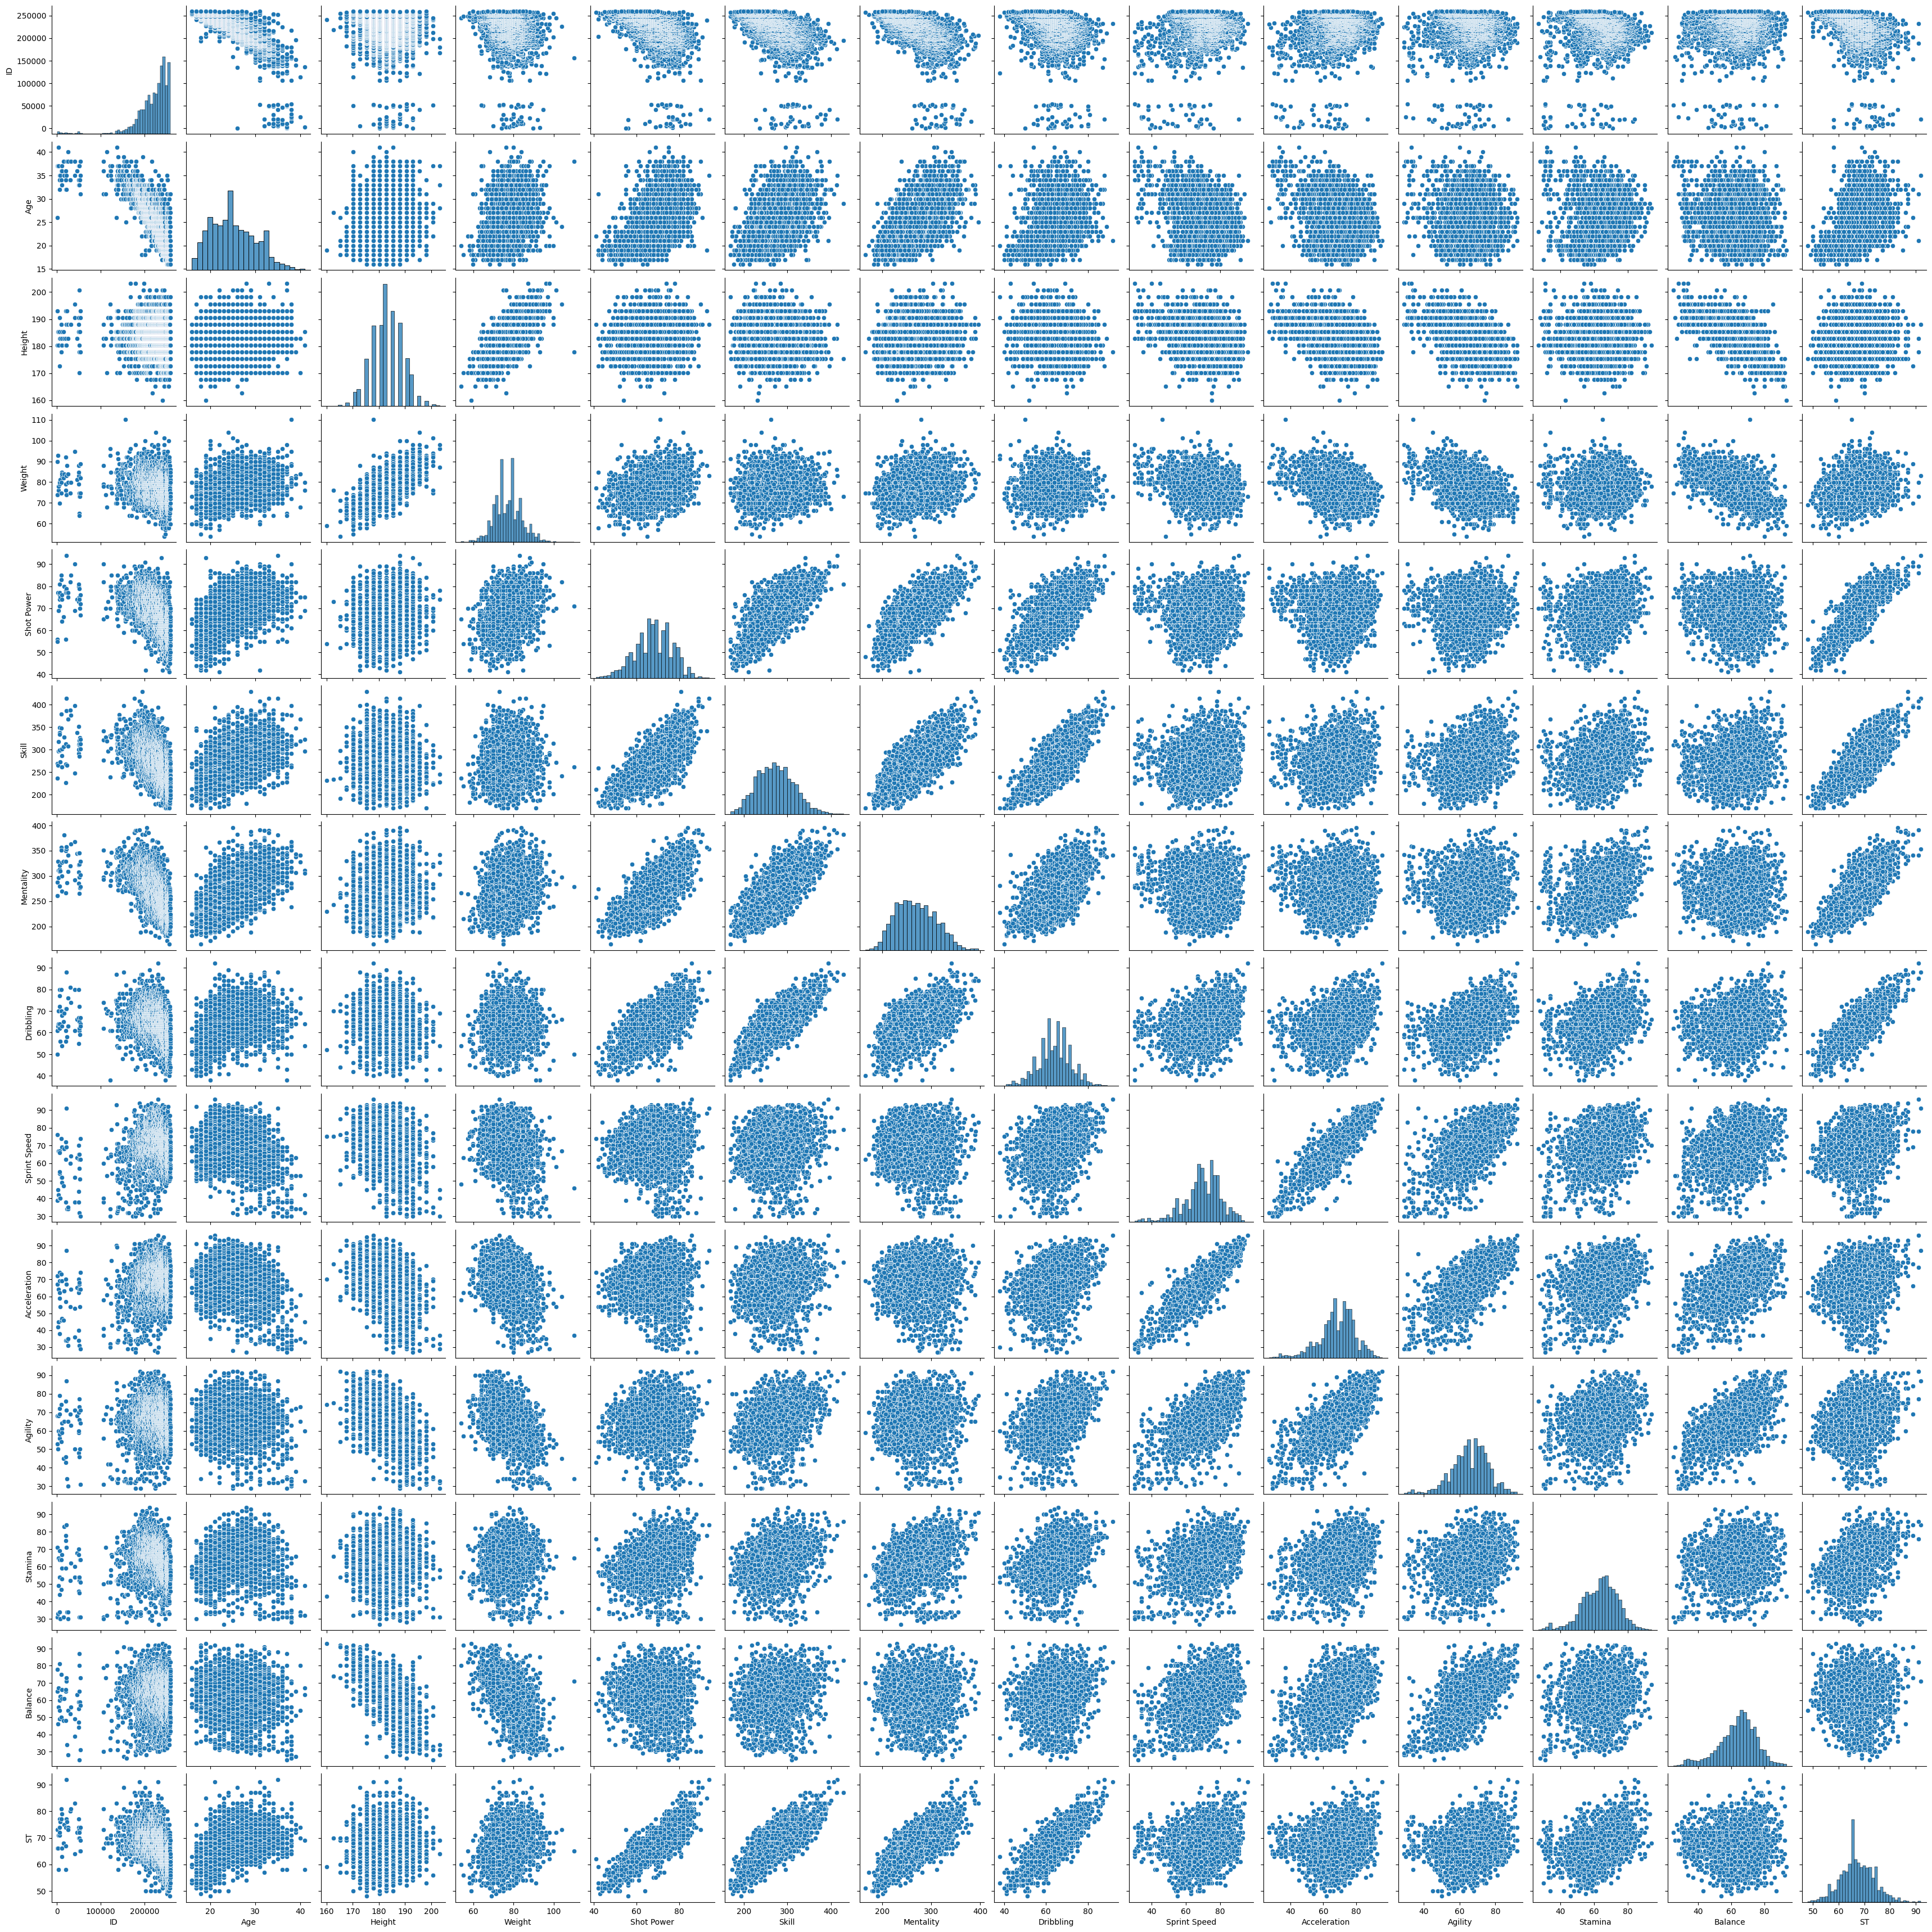

In [39]:
# For better understanding of how variables are corelated, a pair plot is generated.
sns.pairplot(fifa_ST_filtered)
plt.show()

Based on the heatmap and pairplot result, the 'Shoot power','Skill','Mentality','Dribbling'and 'stamina' are the most correlated variables to our dependent variable, ST. We are gonna train our Multi variable linear regression(MVLRG) model with these features.

In [40]:
#The first step is to split the data set into to subsets. Trainning set which contains 80 percent of the whole data and 
# Test set with the reamaining 20 percent. Random_state argument works somehow like random.seed() in our case and prevents 
# two sub sets of changing each time the cell is executed.

X = fifa_ST_filtered[['Shot Power','Mentality','Skill','Dribbling','Stamina']]
#X = fifa_ST_filtered[['Shot Power','Dribbling']]
Y = fifa_ST_filtered['ST']
X_train, X_test, y_train, y_test = train_test_split(  
  X,Y ,random_state=100,test_size=0.2, shuffle=True)
print('X_train : ')
print(X_train.head())
print(X_train.shape)
print(type(X_train))
 
print('')
print('X_test : ')
print(X_test.head())
print(X_test.shape)
print(type(X_test))
 
print('')
print('y_train : ')
print(y_train.head())
print(y_train.shape)
print(type(y_train))
 
print('')
print('y_test : ')
print(y_test.head())
print(y_test.shape)
print(type(y_test))

X_train : 
       Shot Power  Mentality  Skill  Dribbling  Stamina
1587           75        286    292         66       53
16523          68        213    270         67       48
1870           76        306    253         44       54
8375           64        238    290         65       69
15048          55        217    226         56       62
(2115, 5)
<class 'pandas.core.frame.DataFrame'>

X_test : 
       Shot Power  Mentality  Skill  Dribbling  Stamina
11239          63        229    227         61       71
3061           80        321    296         71       71
6263           59        228    238         64       55
4624           67        259    289         64       60
11818          59        221    245         58       59
(529, 5)
<class 'pandas.core.frame.DataFrame'>

y_train : 
1587     72
16523    64
1870     66
8375     65
15048    58
Name: ST, dtype: int64
(2115,)
<class 'pandas.core.series.Series'>

y_test : 
11239    66
3061     74
6263     63
4624     66
11818    64
N

In [41]:
# The next step is to train the model.
model = linear_model.LinearRegression()
result = model.fit(X_train,y_train)

In [42]:
pd.DataFrame(data=[result.coef_],index=['Coef'], columns=[['Shot Power','Mentality','Skill','Dribbling','Stamina']])
#pd.DataFrame(data=[result.coef_],index=['Coef'], columns=[['Shot Power','Dribbling']])

Shot Power Mentality  Skill Dribbling Stamina
Coef      0.295     0.036 -0.005     0.344   0.036

The MVLRG result shows that skill, Stamina and Mentality have not much of say in the prediction of the result. It may cuased becuase of collinearity of these variables which will be tested.

In [43]:
result.intercept_

14.373843255716281

In [44]:
model.score(X_train,y_train)

0.8697509736472385

In [45]:
model.score(X_test,y_test)

0.8612527086300258

The R2 score for trian and test sets are quite promising.

In [46]:
# To test the existence of the multicollinearity, we used variance_inflation_factor(VIF) method from statsmodels library.
vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
vif_data

feature     VIF
0  Shot Power 160.643
1   Mentality 136.141
2       Skill 176.453
3   Dribbling 181.729
4     Stamina  42.502

Reslut of VIF method is not as we predicted. We guessed that there is a collinearity among skills and other variables, however the result suggests that there are  collinearity among all the variables! If it was true the R2 score shoul've be terrible, but we saw that it's not. We tried to test the model with other set of independent variables, but the current set generates the best result.